In [1]:
import numpy as np
import math
import pandas as pd
from timeit import default_timer as timer  
import datetime

from pandas_datareader import data
import pandas_datareader as web
import seaborn as sns

import datetime
from datetime import timezone
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('dark_background')

from scipy.optimize import minimize
from scipy import stats
from random import sample
import statsmodels.api as sm

import yahoo_finance as yf  
import yahoo_fin.stock_info as si

import statsmodels
from IPython.display import display, clear_output

from pathlib import Path


In [2]:
df = pd.read_csv("./Data Preprocessed/Dataset_sentiment_100K_glove.csv", index_col = 0)
format = "%Y-%m-%d %H"
df.index = [datetime.strptime(i, format) for i in df.index]
df

,Bitcoin,Bitcoin_median,Open
2017-09-13 01:00:00,0.619920,0.696973,4128.005439
2017-09-13 02:00:00,0.622358,0.712012,4066.801167
2017-09-13 03:00:00,0.606128,0.668722,3999.225167
2017-09-13 04:00:00,0.588174,0.661256,3959.409667
2017-09-13 05:00:00,0.624468,0.733002,3995.046667
...,...,...,...
2019-01-22 18:00:00,0.640605,0.700322,3584.926897
2019-01-22 19:00:00,0.637766,0.700322,3585.858545
2019-01-22 20:00:00,0.632203,0.700322,3585.295893
2019-01-22 21:00:00,0.644075,0.708547,3579.910755


#### Trading Strategy Backtesting <a class="anchor" id="section_5_3"></a>

In [3]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.append('./Trading Strategy')
from custom_trading_engine import customNLP
from signals import *
from strategies import *

In [27]:
#best strategy play the opposite (with stoploss)
cash = []
for stop in range(1, 50):
    signal = Signal2(df['Bitcoin'])
    strategy = BitcoinNLPStrategy2()
    strategy.add_signal(signal)
    algo = customNLP(100000, df['Open'], strategy)
    algo.set_stoploss(stop/1000)
    
    algo.run(split = True, verbose = False)
    cash.append(algo.cash)
#plt.plot(list(algo.metrics['Portfolio Marked']))

./Trading Strategy\signals.py:19: RuntimeWarning: invalid value encountered in double_scalars
  return -10000 * (self.data[datetime] - mean) / stdv


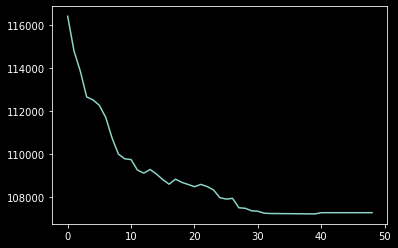

In [28]:
plt.plot(cash)

In [35]:
signal = Signal2(df['Bitcoin'])
strategy = BitcoinNLPStrategy2()
strategy.add_signal(signal)
algo = customNLP(100000, df['Open'], strategy)
algo.set_stoploss(0.01)

algo.run(split = True)

./Trading Strategy\signals.py:19: RuntimeWarning: invalid value encountered in double_scalars
  return -10000 * (self.data[datetime] - mean) / stdv


selling  10000.0  BTC at  4066.801166666666  $
closing  -10000.0  BTC at  3999.2251666666666  $
buying  14004.317648548982  BTC at  3999.2251666666666  $
closing  14004.317648548982  BTC at  3995.046666666667  $
selling  9000.840094492209  BTC at  3995.046666666667  $
closing  -9000.840094492209  BTC at  3982.99  $
selling  15149.489123597245  BTC at  3982.99  $
closing  -15149.489123597245  BTC at  3969.537118644068  $
buying  3684.550066133664  BTC at  3969.537118644068  $
Stoploss Triggered at  3926.753000000001
closing  3684.550066133664  BTC at  3929.841747457627  $
buying  24707.066341683738  BTC at  3839.3781666666655  $
closing  24707.066341683738  BTC at  3833.9163333333327  $
buying  4343.016579164817  BTC at  3833.9163333333327  $
closing  4343.016579164817  BTC at  3868.011  $
buying  6795.067221685111  BTC at  3868.011  $
Stoploss Triggered at  3794.985666666667
closing  6795.067221685111  BTC at  3829.3308899999997  $
buying  2125.3493459889823  BTC at  3820.265666666667 

buying  7308.875205004626  BTC at  5696.920333333334  $
closing  7308.875205004626  BTC at  5708.544915254237  $
selling  18905.707985960802  BTC at  5708.544915254237  $
closing  -18905.707985960802  BTC at  5760.29559322034  $
buying  638.1623992502587  BTC at  5760.29559322034  $
closing  638.1623992502587  BTC at  5760.29559322034  $
selling  10000.0  BTC at  6071.602833333333  $
closing  -10000.0  BTC at  6059.425423728813  $
selling  17942.662605453046  BTC at  6059.425423728813  $
closing  -17942.662605453046  BTC at  6075.103666666666  $
selling  11622.725727109417  BTC at  6075.103666666666  $
closing  -11622.725727109417  BTC at  6094.0425  $
buying  9774.12972558739  BTC at  6094.0425  $
closing  9774.12972558739  BTC at  6111.947  $
buying  5637.694673637693  BTC at  6111.947  $
closing  5637.694673637693  BTC at  6104.586166666664  $
buying  11887.941933681645  BTC at  6104.586166666664  $
closing  11887.941933681645  BTC at  6139.857000000002  $
selling  3466.371002605903

Stoploss Triggered at  9603.173
closing  1404.0152929704584  BTC at  9618.526829999999  $
selling  3722.6120051421026  BTC at  9493.832333333332  $
Stoploss Triggered at  9722.6475
closing  -3722.6120051421026  BTC at  9588.770656666666  $
buying  5709.206466169877  BTC at  9909.643333333335  $
closing  5709.206466169877  BTC at  9920.217499999995  $
selling  10798.613486314274  BTC at  9920.217499999995  $
closing  -10798.613486314274  BTC at  9932.624833333331  $
selling  3906.5770238672485  BTC at  9932.624833333331  $
Stoploss Triggered at  10209.417
closing  -3906.5770238672485  BTC at  10031.951081666664  $
buying  1934.3258753236669  BTC at  10490.464999999998  $
closing  1934.3258753236669  BTC at  10612.173333333332  $
buying  4117.41513747727  BTC at  10612.173333333332  $
closing  4117.41513747727  BTC at  10541.908833333337  $
selling  5097.503023088173  BTC at  10541.908833333337  $
closing  -5097.503023088173  BTC at  10609.457333333334  $
buying  294.6533546896427  BTC a

closing  -8126.862020100668  BTC at  10526.78966666667  $
buying  7963.432654172945  BTC at  10526.78966666667  $
closing  7963.432654172945  BTC at  10724.563166666669  $
buying  3063.484605531993  BTC at  10724.563166666669  $
closing  3063.484605531993  BTC at  10932.872  $
buying  8930.894003790638  BTC at  10932.872  $
closing  8930.894003790638  BTC at  11081.461694915251  $
selling  8932.919375285637  BTC at  11081.461694915251  $
closing  -8932.919375285637  BTC at  11060.411666666669  $
selling  4588.670509856231  BTC at  11060.411666666669  $
closing  -4588.670509856231  BTC at  10995.624137931034  $
buying  4906.775672442448  BTC at  10995.624137931034  $
closing  4906.775672442448  BTC at  11012.082166666669  $
selling  2199.8839959242937  BTC at  11012.082166666669  $
closing  -2199.8839959242937  BTC at  10903.810333333333  $
selling  7382.899325898531  BTC at  10903.810333333333  $
closing  -7382.899325898531  BTC at  10861.352666666668  $
buying  6604.971110904155  BTC 

closing  10060.555262878748  BTC at  9344.386333333332  $
buying  3110.563114276128  BTC at  9344.386333333332  $
closing  3110.563114276128  BTC at  9303.165833333333  $
buying  5054.236308168367  BTC at  9303.165833333333  $
closing  5054.236308168367  BTC at  9292.639  $
selling  2210.9793693209544  BTC at  9292.639  $
closing  -2210.9793693209544  BTC at  9219.322500000002  $
buying  921.8144725563852  BTC at  9219.322500000002  $
Stoploss Triggered at  9103.923000000004
closing  921.8144725563852  BTC at  9127.129275000001  $
buying  8099.950036009639  BTC at  9130.901666666668  $
closing  8099.950036009639  BTC at  9143.003333333332  $
buying  1285.2961823659734  BTC at  9143.003333333332  $
closing  1285.2961823659734  BTC at  9141.414333333332  $
buying  5034.187537170963  BTC at  9141.414333333332  $
closing  5034.187537170963  BTC at  9169.883333333331  $
buying  2729.4986490332653  BTC at  9169.883333333331  $
closing  2729.4986490332653  BTC at  9221.027166666669  $
selling

closing  -10000.0  BTC at  8272.339661016948  $
buying  10874.838880169671  BTC at  8272.339661016948  $
closing  10874.838880169671  BTC at  8255.919152542374  $
buying  16932.60661779627  BTC at  8255.919152542374  $
closing  16932.60661779627  BTC at  8258.045166666667  $
buying  7700.529336872584  BTC at  8258.045166666667  $
closing  7700.529336872584  BTC at  8262.764067796612  $
buying  3612.733226453872  BTC at  8262.764067796612  $
closing  3612.733226453872  BTC at  8261.191016949151  $
buying  2279.8549328657286  BTC at  8261.191016949151  $
closing  2279.8549328657286  BTC at  8277.259  $
selling  2002.1124303541721  BTC at  8277.259  $
closing  -2002.1124303541721  BTC at  8312.420833333334  $
selling  6506.166084045211  BTC at  8312.420833333334  $
closing  -6506.166084045211  BTC at  8349.798  $
selling  13991.94811036724  BTC at  8349.798  $
closing  -13991.94811036724  BTC at  8321.3235  $
selling  8621.69089710925  BTC at  8321.3235  $
closing  -8621.69089710925  BTC 

closing  -6008.674156333686  BTC at  6508.431  $
selling  2435.8375726345644  BTC at  6508.431  $
closing  -2435.8375726345644  BTC at  6528.007166666665  $
buying  17356.611176569626  BTC at  6528.007166666665  $
closing  17356.611176569626  BTC at  6493.848103448277  $
buying  7068.494942827356  BTC at  6493.848103448277  $
closing  7068.494942827356  BTC at  6460.144406779661  $
selling  10000.0  BTC at  6710.740333333333  $
closing  -10000.0  BTC at  6685.136333333334  $
buying  13753.963531350213  BTC at  6685.136333333334  $
closing  13753.963531350213  BTC at  6702.483389830508  $
selling  14030.852923469514  BTC at  6702.483389830508  $
closing  -14030.852923469514  BTC at  6702.170677966101  $
selling  2374.065022885377  BTC at  6702.170677966101  $
closing  -2374.065022885377  BTC at  6697.155833333333  $
selling  5466.692430479736  BTC at  6697.155833333333  $
closing  -5466.692430479736  BTC at  6689.229666666666  $
buying  6680.864059959048  BTC at  6689.229666666666  $
cl

closing  10410.360923584562  BTC at  7452.949833333332  $
buying  3276.488230052057  BTC at  7452.949833333332  $
closing  3276.488230052057  BTC at  7483.025666666666  $
buying  9317.805287582574  BTC at  7483.025666666666  $
Stoploss Triggered at  7389.787333333335
closing  9317.805287582574  BTC at  7408.195409999999  $
buying  14119.442972133047  BTC at  7302.360166666666  $
closing  14119.442972133047  BTC at  7372.996666666667  $
buying  10000.0  BTC at  7284.191166666668  $
closing  10000.0  BTC at  7280.348833333333  $
buying  3948.287991795042  BTC at  7280.348833333333  $
closing  3948.287991795042  BTC at  7276.789661016948  $
selling  6802.560606494978  BTC at  7276.789661016948  $
closing  -6802.560606494978  BTC at  7309.336379310345  $
selling  15402.544106727612  BTC at  7309.336379310345  $
closing  -15402.544106727612  BTC at  7326.894499999999  $
buying  2997.2257472557594  BTC at  7326.894499999999  $
closing  2997.2257472557594  BTC at  7330.901166666666  $
selling

closing  -18545.857410949317  BTC at  6698.714827586207  $
selling  11762.285958104565  BTC at  6698.714827586207  $
closing  -11762.285958104565  BTC at  6706.258644067797  $
buying  5926.123110794228  BTC at  6706.258644067797  $
closing  5926.123110794228  BTC at  6713.543833333332  $
buying  26999.101154641598  BTC at  6713.543833333332  $
closing  26999.101154641598  BTC at  6692.721186440678  $
buying  6903.069679933962  BTC at  6692.721186440678  $
closing  6903.069679933962  BTC at  6729.739666666667  $
selling  5089.483992658017  BTC at  6729.739666666667  $
closing  -5089.483992658017  BTC at  6734.288793103448  $
selling  11557.5564076941  BTC at  6734.288793103448  $
closing  -11557.5564076941  BTC at  6736.481785714286  $
selling  5679.27135624989  BTC at  6736.481785714286  $
closing  -5679.27135624989  BTC at  6735.711578947367  $
buying  11028.816105893982  BTC at  6735.711578947367  $
closing  11028.816105893982  BTC at  6727.595  $
buying  5218.392265908185  BTC at  6

closing  15414.754006151892  BTC at  6435.236250000002  $
buying  4480.616008293903  BTC at  6435.236250000002  $
closing  4480.616008293903  BTC at  6415.769310344827  $
selling  9564.24032997016  BTC at  6415.769310344827  $
closing  -9564.24032997016  BTC at  6393.499491525425  $
selling  5407.356055260994  BTC at  6393.499491525425  $
closing  -5407.356055260994  BTC at  6372.5680357142855  $
buying  15801.842584891352  BTC at  6372.5680357142855  $
closing  15801.842584891352  BTC at  6394.258775510204  $
selling  10000.0  BTC at  6403.146909090909  $
closing  -10000.0  BTC at  6415.217872340427  $
buying  1326.708168716723  BTC at  6415.217872340427  $
closing  1326.708168716723  BTC at  6446.064782608695  $
buying  12499.966683308645  BTC at  6446.064782608695  $
closing  12499.966683308645  BTC at  6444.43709090909  $
buying  2627.070357333646  BTC at  6444.43709090909  $
closing  2627.070357333646  BTC at  6432.411272727274  $
buying  6034.197592329966  BTC at  6432.4112727272

closing  -21433.19489876046  BTC at  3785.590344827586  $
selling  3108.6231800788805  BTC at  3785.590344827586  $
closing  -3108.6231800788805  BTC at  3785.5161666666672  $
buying  1354.6111543441714  BTC at  3785.5161666666672  $
closing  1354.6111543441714  BTC at  3795.600862068965  $
selling  800.8928114800362  BTC at  3795.600862068965  $
closing  -800.8928114800362  BTC at  3782.3075  $
selling  5590.023862874639  BTC at  3782.3075  $
closing  -5590.023862874639  BTC at  3779.3925  $
selling  2413.8016900034236  BTC at  3779.3925  $
closing  -2413.8016900034236  BTC at  3767.281896551725  $
buying  6267.287217572616  BTC at  3767.281896551725  $
closing  6267.287217572616  BTC at  3747.778644067797  $
buying  474.563008246884  BTC at  3747.778644067797  $
closing  474.563008246884  BTC at  3759.110677966102  $
buying  14428.12001030988  BTC at  3759.110677966102  $
closing  14428.12001030988  BTC at  3767.119824561403  $
selling  1036.464207464279  BTC at  3767.119824561403  $

In [ ]:
# signal = RandomSignal()
# strategy = BitcoinBNHStrategy()
# strategy.add_signal(signal)
# algo = customNLP(100000, df['Open'], strategy)
# #algo.set_stoploss(0.01)
# algo.run(split = True)

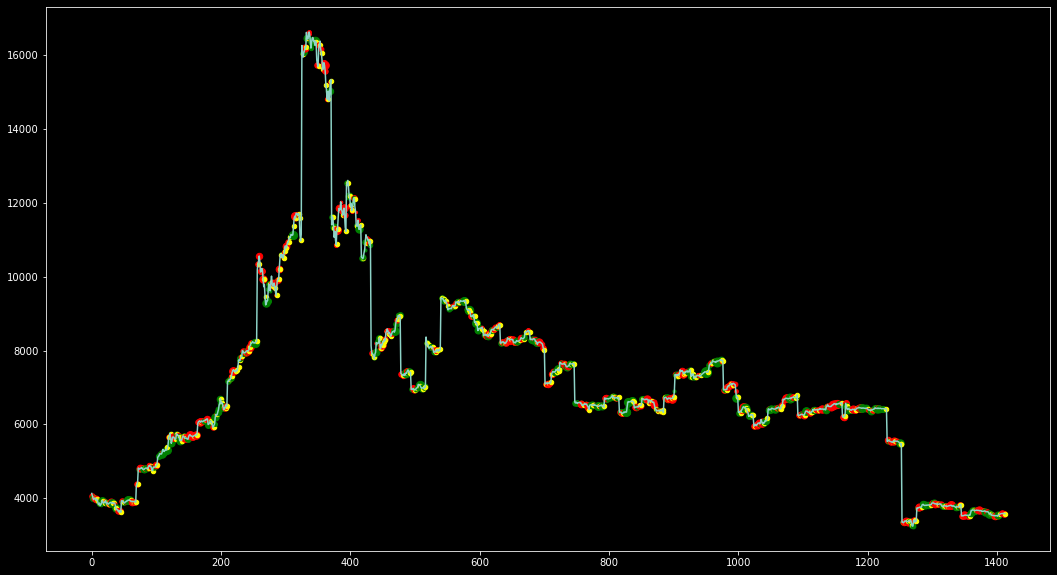

In [30]:
algo.plot()

In [39]:
algo.cash

109770.41689815986

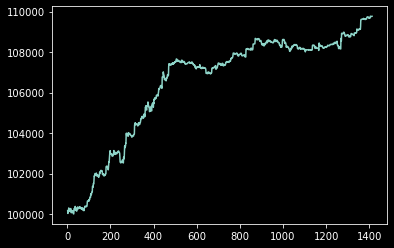

In [36]:
plt.plot(list(algo.metrics['Portfolio Marked']))

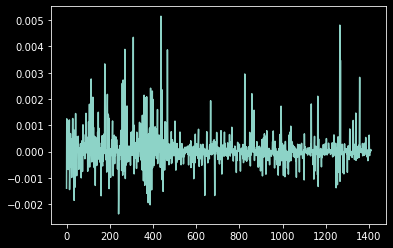

In [37]:
returns = algo.metrics['Portfolio Marked'].pct_change().dropna().values
plt.plot(returns)

In [38]:
sr = ((np.mean(returns)-0.035/24/365)/np.std(returns)*math.sqrt(365*24))
sr

9.979471698194738

##### Generate Random Strategies

In [ ]:
strategy = BitcoinRandomStrategy()
sr = []
for i in range(0,100):
    loading_bar(i, 99)
    algo = customNLP(100000, df['Open'], strategy)
    algo.set_stoploss(0.01)
    algo.run(split = True, verbose = False)
    returns = algo.metrics['Portfolio Marked'].pct_change().dropna().values
    sr.append((np.mean(returns)-0.035/24/365)/np.std(returns)*math.sqrt(365*24))
np.mean(sr)

In [ ]:
np.median(sr)

### Plotting and Testing

In [ ]:
#Prints a simple loading bar
def loading_bar(n,N, message = ''):
    prc  = math.floor(n/N*100)
    a = prc*'#'
    b = (100-prc)*'_'
    clear_output(wait=True)
    display('|' + a + b + '|' + str(prc) + '%' + " " + message)